<a href="https://colab.research.google.com/github/sonpn82/Tensor-flow-Developer-Certification-Exam/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplity it: predicting a numerical variable based on some other combination of variables, even shorter ... predicting a number.

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit

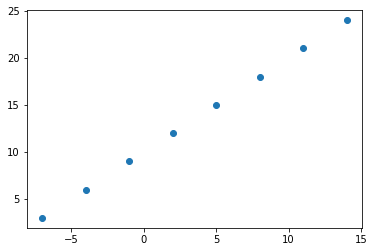

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4.,-1.,2.,5.,8.,11.,14.])

# Create labels
y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])

# Visualize it
plt.scatter(X, y)

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

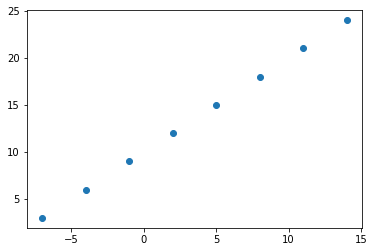

In [ ]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model. 
2. **Compiling a model** -define the loss function (in others words, the function which tells our model how wrong it is) and the otimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and lables).

In [ ]:
# Set random seed
tf.random.set_seed(24)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is hort for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])  

#. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 568ms/step - loss: 19.8558 - mae: 19.8558
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 19.5746 - mae: 19.5746
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 19.2933 - mae: 19.2933
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 19.0121 - mae: 19.0121
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 18.7308 - mae: 18.7308


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.])

In [ ]:
y_pred + 11

array([[-7.5093994]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization or perhaps the "learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model
#1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 567ms/step - loss: 8.8006 - mae: 8.8006
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 8.6681 - mae: 8.6681
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 8.5356 - mae: 8.5356
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 8.4031 - mae: 8.4031
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 8.2706 - mae: 8.2706
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.1381 - mae: 8.1381
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 8.0056 - mae: 8.0056
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 7.8731 - mae: 7.8731
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 7.7406 - mae: 7.7406
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.6081 - mae: 7.6081
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 7

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

array([[30.148031]], dtype=float32)

In [ ]:
# Let see if we can make another to improve the model

#1. Create the model (with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 723ms/step - loss: 13.2703 - mae: 13.2703
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 12.5250 - mae: 12.5250
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 11.7812 - mae: 11.7812
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0378 - mae: 11.0378
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 10.2938 - mae: 10.2938
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 9.5467 - mae: 9.5467
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 8.7931 - mae: 8.7931
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 8.0291 - mae: 8.0291
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 7.2503 - mae: 7.2503
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 6.7960 - mae: 6.7960
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - los

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0])

array([[26.841167]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural network is:

Build a model => fit it -> evaluate it => tweak it=> fit it => ...

When it comes to evaluation...there are 3words you shoul memorie:
"Visualize, Visuallize, visualize"
It's a good idea to visualize?
* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The traning of a model - how does a model perform while it learns
* The predictions of a odel - how do the precisions of a model line up against the grould truth(

In [5]:
# Make a bigger dataset
X = tf.range(-100, 100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [6]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

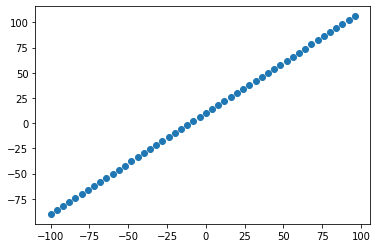

In [7]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets

* **Training set** - the model learns from this data, which is typically 70-80% of total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [8]:
# Check the length of how many samples we have
len(X)

50

In [9]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40] # first 40 are training samples (80% of the data)

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:] # last 10 are testing samples (20% of the data)

len(X_train), len(X_test)

(40, 10)

### Visualing the data

Now we've got our data in training and test sets... let's visualize it again!

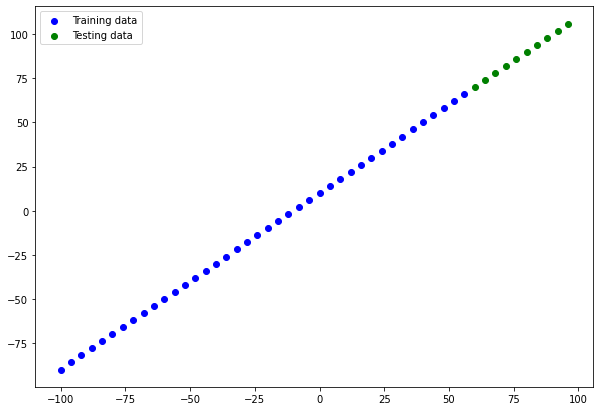

In [10]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()

In [11]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
#model.fit(X_train, y_train, epochs=100)

### Visualize the model

In [12]:
model.summary()

ValueError: ignored

In [13]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [14]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(24)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])                               
])

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

** Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

Exercise

In [16]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output")                          
], name="models_to_be_built")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [17]:
model.summary()

Model: "models_to_be_built"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Lets 'fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "models_to_be_built"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


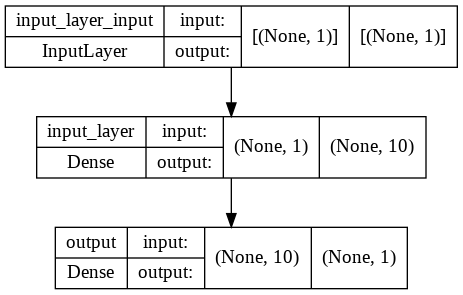

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our models' prediction

To visualize predictions, it'sa good idea to plot them against the round truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model prediction)

In [19]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred
                      

array([[15.106327],
       [16.113413],
       [17.120504],
       [18.12759 ],
       [19.134684],
       [20.141771],
       [21.148855],
       [22.155945],
       [23.163034],
       [24.170122]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [20]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth value
  """

  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot testing dat in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend();

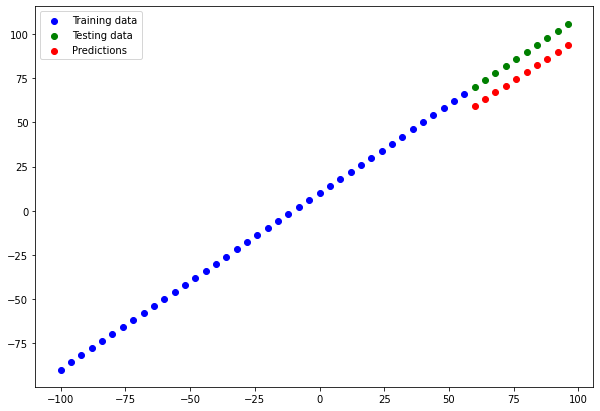

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's prediction with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evalutate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 138ms/step - loss: 11.3979 - mae: 11.3979


[11.397873878479004, 11.397873878479004]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([28.675266, 24.835846, 20.996422, 17.325603, 14.390553, 12.191266,
       10.727748, 10.      , 10.00802 , 10.775904], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[59.324734],
       [63.164154],
       [67.00358 ],
       [70.842995],
       [74.68241 ],
       [78.521835],
       [82.36126 ],
       [86.20068 ],
       [90.0401  ],
       [93.87952 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([59.324734, 63.164154, 67.00358 , 70.842995, 74.68241 , 78.521835,
       82.36126 , 86.20068 , 90.0401  , 93.87952 ], dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=11.397873>

In [ ]:
# Calculate the mean square eror
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=130.12424>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

Build a model => fit it => evaluate it => tweak it => fit it => eva ...

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make you model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

Build `model_1`

In [ ]:
# Set random seed
tf.random.set_seed(24)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 95.2833 - mae: 95.2833
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 60.9137 - mae: 60.9137
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 30.4818 - mae: 30.4818
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 7.9957 - mae: 7.9957
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 9.6778 - mae: 9.6778
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1314 - mae: 11.1314
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2098 - mae: 10.2098
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.3906 - mae: 10.3906
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 7.6215 - mae: 7.6215
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4041 - mae: 9.4041
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - 

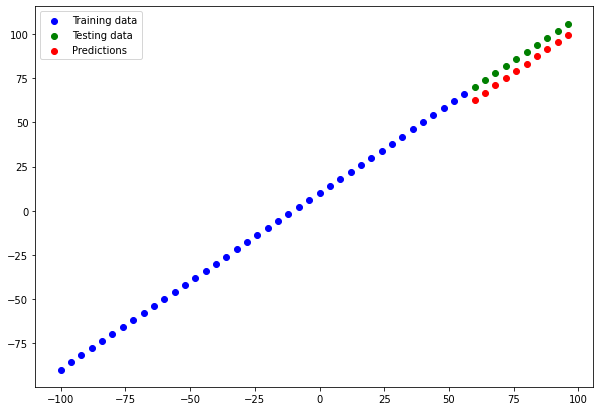

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=6.786891>,
 <tf.Tensor: shape=(), dtype=float32, numpy=46.13796>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(24)

# 1. Create the model

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                             
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 40.6500 - mae: 40.6500
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 19.6281 - mae: 19.6281
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 20.4913 - mae: 20.4913
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 12.5051 - mae: 12.5051
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 11.6015 - mae: 11.6015
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 20.2044 - mae: 20.2044
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 15.2340 - mae: 15.2340
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 23.9551 - mae: 23.9551
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 13.5147 - mae: 13.5147
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.8302 - mae: 10.8302
Epoch 11/100
2/2 [==============================] - 0s 3ms/

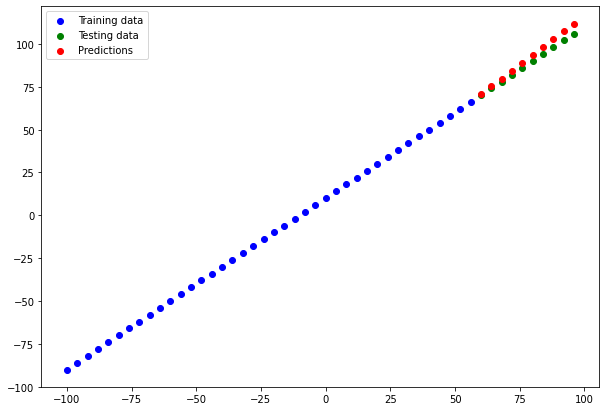

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.2645698>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.435565>)

**Build model 3**

* 2 layers, trained for 500 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(24)

# 1. Create the model
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10)                                      ,
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 40.6500 - mae: 40.6500
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 19.6281 - mae: 19.6281
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 20.4913 - mae: 20.4913
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 12.5051 - mae: 12.5051
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 11.6015 - mae: 11.6015
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 20.2044 - mae: 20.2044
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 15.2340 - mae: 15.2340
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 23.9551 - mae: 23.9551
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 13.5147 - mae: 13.5147
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 10.8302 - mae: 10.8302
Epoch 11/500
2/2 [==============================] - 0s 4ms/

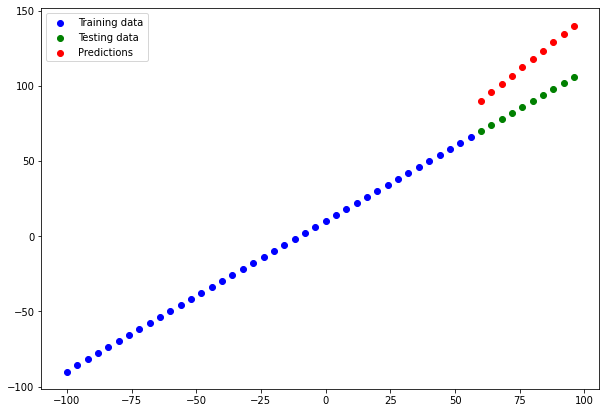

In [ ]:
# Make and plot predictions for model_2
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model 3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=27.195185>,
 <tf.Tensor: shape=(), dtype=float32, numpy=759.6576>)

**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.


In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
              
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,6.786891,46.137959
1,model_2,3.264570,13.435565
2,model_3,27.195185,759.657593


Looks like model_2 performed the best...

In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioners' motto: "experiment, experiment, experiment"

## Tracking your experiments 

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you'r running lots of experiments.

Luckily there are tools to help us!

**Resourse:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).



## Saving our models

Saving our models allows us to use them outside of Google Collab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_2_preds.squeeze()

array([ 70.65323 ,  75.23353 ,  79.81383 ,  84.39412 ,  88.97443 ,
        93.554726,  98.13501 , 102.71531 , 107.295616, 111.87591 ],
      dtype=float32)

In [ ]:
loaded_SavedModel_format_preds.squeeze()

array([ 70.65323 ,  75.23353 ,  79.81383 ,  84.39412 ,  88.97443 ,
        93.554726,  98.13501 , 102.71531 , 107.295616, 111.87591 ],
      dtype=float32)

In [ ]:
# Load in a model using HDF5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare h5 model with model_2
loaded_h5_model_pred = loaded_h5_model.predict(X_test)
loaded_h5_model_pred == model_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download"
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell)

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google drive (requires mounting google drive - by click the drive icon below the Files icon)
!cp /content/best_model_HDF5_format.h5 "/content/drive/MyDrive/Colab Notebooks"

In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks"

00_tensorflow_fundamentals.ipynb
01_neural_network_regression_with_tensorflow_video.ipynb
best_model_HDF5_format.h5


## A larger example

In [46]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# Read in insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [48]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [49]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

# View 
X.head()



,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [50]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [51]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [52]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
132,53,35.900,2,1,0,1,0,0,0,0,1
508,24,25.270,0,1,0,1,0,1,0,0,0
422,40,32.775,1,0,1,0,1,1,0,0,0
613,34,19.000,3,1,0,1,0,1,0,0,0
1111,38,38.390,3,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
145,29,38.830,3,1,0,1,0,0,0,1,0
343,63,36.765,0,0,1,1,0,1,0,0,0
192,25,25.740,0,0,1,1,0,0,0,1,0
899,19,22.515,0,1,0,1,0,0,1,0,0


In [53]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(24)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                       
])

#2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8580.8857 - mae: 8580.8857
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7737.1792 - mae: 7737.1792
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7504.8779 - mae: 7504.8779
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7943.0093 - mae: 7943.0093
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7718.9326 - mae: 7718.9326
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7787.1279 - mae: 7787.1279
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7402.6890 - mae: 7402.6890
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7943.7319 - mae: 7943.7319
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7788.5469 - mae: 7788.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7685.2886 - mae: 7685.2886

In [54]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7851.0737 - mae: 7851.0737


[7851.07373046875, 7851.07373046875]

In [55]:
y_train.median(), y_train.mean()


(9618.996575000001, 13352.418761690644)

Right now it looks like our model is not performing too well... let's try and improve it!

To improve our model, we'll run several experiments:
1. Add an extra layer with more hidden units
2. Train for longer
3. Use Adam instead of SGD

In [56]:
# improvement
tf.random.set_seed(24)

#1. Create the model
insurance_model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                   
])

#2. Compile the model
insurance_model2.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mae"])

#3. Fit the model
insurance_model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13298.5820 - mae: 13298.5820
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13131.2783 - mae: 13131.2783
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12789.3262 - mae: 12789.3262
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12116.7744 - mae: 12116.7744
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10977.4053 - mae: 10977.4053
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9518.7754 - mae: 9518.7754
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8195.0508 - mae: 8195.0508
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.5439 - mae: 7528.5439
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7395.8105 - mae: 7395.8105
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7371.9785 - mae:

In [57]:
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5021.5278 - mae: 5021.5278


[5021.52783203125, 5021.52783203125]

In [58]:
# Test again with larger number of epochs
tf.random.set_seed(24)

#1. Create the model
insurance_model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                          
])

#2. Compile the model
insurance_model3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

#3. Fit the model
history = insurance_model3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13298.5820 - mae: 13298.5820
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13131.2783 - mae: 13131.2783
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12789.3262 - mae: 12789.3262
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12116.7744 - mae: 12116.7744
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10977.4053 - mae: 10977.4053
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9518.7754 - mae: 9518.7754
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8195.0508 - mae: 8195.0508
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.5439 - mae: 7528.5439
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7395.8105 - mae: 7395.8105
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7371.9785 - mae:

In [59]:
insurance_model3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3666.9766 - mae: 3666.9766


[3666.9765625, 3666.9765625]

Text(0.5, 0, 'epochs')

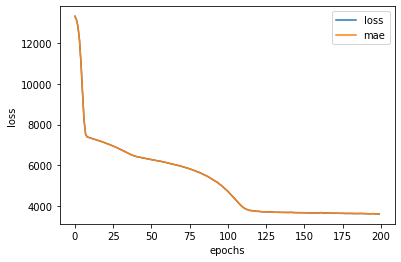

In [60]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question:** How long should you train for?
It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution called the EarlyStopping callback which is a TensorFlow component you can add to your model to stop training when not improving a certain metric.


## Preprocessing data (normalization and standardization)

in terms of scaling values, neural networks tend to prefer normalization.

If you are not sure on which to use, you could try both and see which performs better.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance csv
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


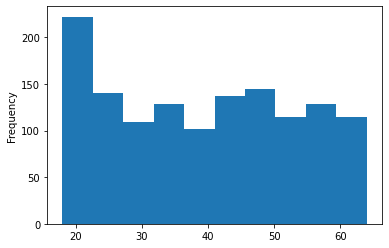

In [63]:
X["age"].plot(kind="hist")

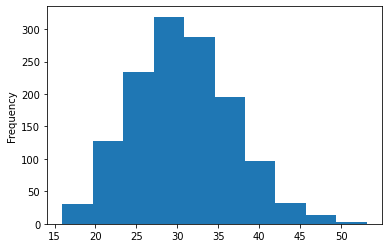

In [64]:
X["bmi"].plot(kind="hist")

In [65]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

To prepare our data, we can borrow a few classes from Scikit-learn

In [2]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformner
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # turn all vals in these columns to between 0-1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker","region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [3]:
# What does our data look like now?
X_train_normal

array([[0.76086957, 0.5445112 , 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.13043478, 0.25423266, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47826087, 0.45917531, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.15217391, 0.26706718, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02173913, 0.17900055, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.63353359, 0.2       , ..., 0.        , 1.        ,
        0.        ]])

In [4]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.
Now let's build a neural network model.

In [5]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(24)

#1. Create the model
insurance_model_normal = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                              
])

#2. Compile the model
insurance_model_normal.compile(loss=tf.keras.losses.mae,
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=["mae"])

#3. Fit the model
insurance_model_normal.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13350.1602 - mae: 13350.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13341.3906 - mae: 13341.3906
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13319.6855 - mae: 13319.6855
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13274.3506 - mae: 13274.3506
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13194.2588 - mae: 13194.2588
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13068.0547 - mae: 13068.0547
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12885.3125 - mae: 12885.3125
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12635.7334 - mae: 12635.7334
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12309.5996 - mae: 12309.5996
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11899.58

In [6]:
# Evaluate our insurance model trained on normalized data
insurance_model_normal.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3606.5161 - mae: 3606.5161


[3606.51611328125, 3606.51611328125]

In [7]:
# Insurance model 2 results
# loss: 5021.5278 - mae: 5021.5278

In [8]:
# Excercise
# Build a 4 Dense layers network
tf.random.set_seed(24)

#1. Create the model
insurance_model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                        
])

#2. Compile the model
insurance_model4.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

#3. Fit the model
insurance_model4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 13345.8164 - mae: 13345.8164
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13288.7969 - mae: 13288.7969
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13005.9463 - mae: 13005.9463
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12100.8613 - mae: 12100.8613
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 10327.3457 - mae: 10327.3457
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 8567.2070 - mae: 8567.2070
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7970.7983 - mae: 7970.7983
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7797.3262 - mae: 7797.3262
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7646.1074 - mae: 7646.1074
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7488.2822 - mae:

In [9]:
insurance_model4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3125.4038 - mae: 3125.4038


[3125.40380859375, 3125.40380859375]

In [11]:
# Model 5: Increase unit in each layer
tf.random.set_seed(24)

#1. Create the model
insurance_model5 = tf.keras.Sequential([
  tf.keras.layers.Dense(150),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                        
])

#2. Compile the model
insurance_model5.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

#3. Fit the model
insurance_model5.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13338.3975 - mae: 13338.3975
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13181.4805 - mae: 13181.4805
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12358.9268 - mae: 12358.9268
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 10219.8037 - mae: 10219.8037
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 8268.6797 - mae: 8268.6797
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7839.6196 - mae: 7839.6196
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7634.9404 - mae: 7634.9404
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7415.0557 - mae: 7415.0557
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7164.1035 - mae: 7164.1035
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 6874.2026 - mae: 6

In [12]:
insurance_model5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3120.8044 - mae: 3120.8044


[3120.804443359375, 3120.804443359375]

In [13]:
# Model 6: Increase learning rate by 10 times in Adam optimizer
tf.random.set_seed(24)

#1. Create the model
insurance_model6 = tf.keras.Sequential([
  tf.keras.layers.Dense(150),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                        
])

#2. Compile the model
insurance_model6.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                         metrics=["mae"])

#3. Fit the model
insurance_model6.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 10846.0869 - mae: 10846.0869
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7082.4766 - mae: 7082.4766
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 4343.2056 - mae: 4343.2056
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 3715.2620 - mae: 3715.2620
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 3616.7163 - mae: 3616.7163
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 3575.4900 - mae: 3575.4900
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 3644.1218 - mae: 3644.1218
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 3608.9829 - mae: 3608.9829
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 3559.7847 - mae: 3559.7847
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 3580.5247 - mae: 3580.52

In [14]:
insurance_model6.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3268.5454 - mae: 3268.5454


[3268.54541015625, 3268.54541015625]

In [15]:
# Model 7: Try 300 epochs!
tf.random.set_seed(24)

#1. Create the model
insurance_model7 = tf.keras.Sequential([
  tf.keras.layers.Dense(150),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                        
])

#2. Compile the model
insurance_model7.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

#3. Fit the model
insurance_model7.fit(X_train_normal, y_train, epochs=300)


Epoch 1/300
34/34 [==============================] - 1s 4ms/step - loss: 13338.3975 - mae: 13338.3975
Epoch 2/300
34/34 [==============================] - 0s 6ms/step - loss: 13181.4805 - mae: 13181.4805
Epoch 3/300
34/34 [==============================] - 0s 5ms/step - loss: 12358.9268 - mae: 12358.9268
Epoch 4/300
34/34 [==============================] - 0s 5ms/step - loss: 10219.8037 - mae: 10219.8037
Epoch 5/300
34/34 [==============================] - 0s 5ms/step - loss: 8268.6797 - mae: 8268.6797
Epoch 6/300
34/34 [==============================] - 0s 5ms/step - loss: 7839.6196 - mae: 7839.6196
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 7634.9404 - mae: 7634.9404
Epoch 8/300
34/34 [==============================] - 0s 5ms/step - loss: 7415.0557 - mae: 7415.0557
Epoch 9/300
34/34 [==============================] - 0s 5ms/step - loss: 7164.1035 - mae: 7164.1035
Epoch 10/300
34/34 [==============================] - 0s 3ms/step - loss: 6874.2026 - mae: 6

In [16]:
insurance_model7.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3127.1108 - mae: 3127.1108


[3127.11083984375, 3127.11083984375]

Build a new model using boston housing dataset

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=24
)

65536/57026 [==================================] - 0s 0us/step


In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [27]:
X_train

array([[4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       [1.32620e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        3.94050e+02, 1.64700e+01],
       [9.06500e-02, 2.00000e+01, 6.96000e+00, ..., 1.86000e+01,
        3.91340e+02, 1.36500e+01],
       ...,
       [2.90900e-01, 0.00000e+00, 2.18900e+01, ..., 2.12000e+01,
        3.88080e+02, 2.41600e+01],
       [1.22040e-01, 0.00000e+00, 2.89000e+00, ..., 1.80000e+01,
        3.57980e+02, 6.65000e+00],
       [4.41700e-02, 7.00000e+01, 2.24000e+00, ..., 1.48000e+01,
        3.90860e+02, 6.07000e+00]])

In [30]:
# Normalize the data
ct = make_column_transformer(
    (MinMaxScaler(),[0,1,2,3,4,5,6,7,8,9,10,11,12])
)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [31]:
# Check the normal values
X_train_normal

array([[5.49837765e-02, 0.00000000e+00, 6.42962963e-01, ...,
        8.08510638e-01, 9.46089061e-01, 4.34042553e-02],
       [1.41958155e-03, 0.00000000e+00, 2.89629630e-01, ...,
        8.82978723e-01, 9.92813556e-01, 4.18156028e-01],
       [9.47848868e-04, 2.00000000e-01, 2.30370370e-01, ...,
        6.38297872e-01, 9.85980130e-01, 3.38156028e-01],
       ...,
       [3.19861059e-03, 0.00000000e+00, 7.83333333e-01, ...,
        9.14893617e-01, 9.77759847e-01, 6.36312057e-01],
       [1.30066490e-03, 0.00000000e+00, 7.96296296e-02, ...,
        5.74468085e-01, 9.01860911e-01, 1.39574468e-01],
       [4.25424874e-04, 7.00000000e-01, 5.55555556e-02, ...,
        2.34042553e-01, 9.84769782e-01, 1.23120567e-01]])

In [43]:
# Set the random
tf.random.set_seed(24)

#1. Create the model
boston_model = tf.keras.Sequential([
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                    
])

#2. Compile the model
boston_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["mae"])

#3. Fit the model
boston_model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 4ms/step - loss: 21.4613 - mae: 21.4613
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 19.7649 - mae: 19.7649
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 17.6559 - mae: 17.6559
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 15.0952 - mae: 15.0952
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 12.3462 - mae: 12.3462
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 10.1652 - mae: 10.1652
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 8.8199 - mae: 8.8199
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 8.2126 - mae: 8.2126
Epoch 9/200
13/13 [==============================] - 0s 3ms/step - loss: 7.7629 - mae: 7.7629
Epoch 10/200
13/13 [==============================] - 0s 3ms/step - loss: 7.3021 - mae: 7.3021
Epoch 11/200
13/13 [===========================

In [44]:
# Evaluate the model
boston_model.evaluate(X_test_normal, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.4452 - mae: 3.4452


[3.445188045501709, 3.445188045501709]

In [34]:
y_train.mean()

22.633415841584164

In [ ]:
# 2 layers SGD mae = 3.4143, Adam = 4.8661, 200 epochs = 3.3851, 20 neurons = 3.3873
# 3 layers SGD mae = 3.4528, Adam = 3.4452

